In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
#seaborn visualization set up
%matplotlib inline

In [2]:
#Reading the dataset
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [3]:
data.shape

(2000, 9)

In [4]:
print(data.groupby('Outcome').size())

Outcome
0    1316
1     684
dtype: int64


In [5]:
data.info() # check number of entries in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

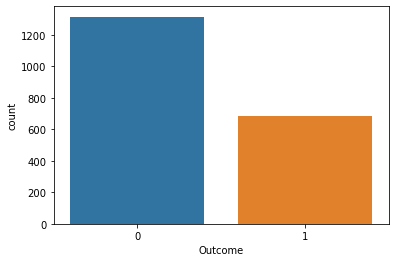

In [7]:
sns.countplot(x= 'Outcome', data = data)     #Plotting the distribution of Outcome

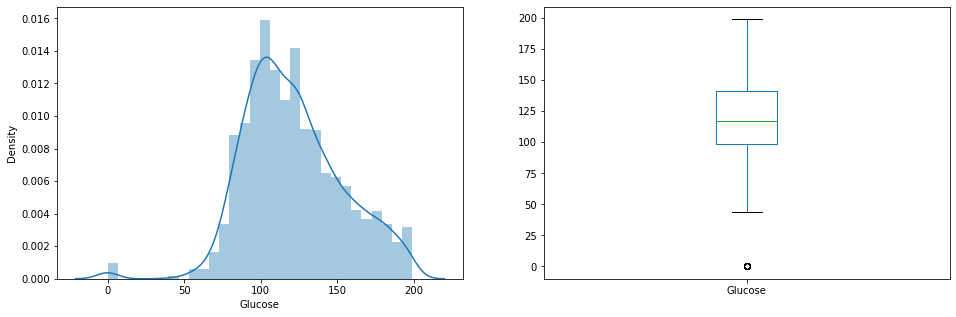

In [8]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['Glucose'])
plt.subplot(122), data['Glucose'].plot.box(figsize=(16,5))
plt.show()

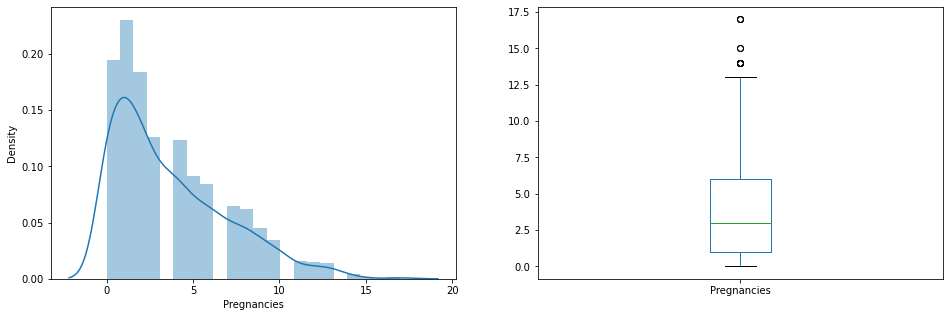

In [9]:
plt.figure(2)
plt.subplot(121), sns.distplot(data['Pregnancies'])
plt.subplot(122), data['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

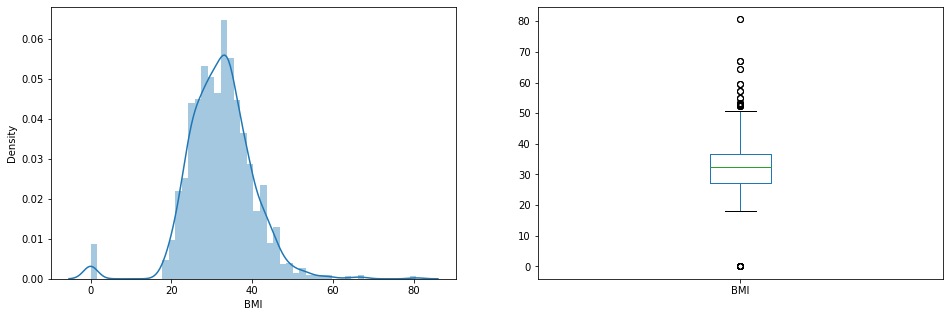

In [10]:
plt.figure(3)
plt.subplot(121), sns.distplot(data['BMI'])
plt.subplot(122), data['BMI'].plot.box(figsize=(16,5))
plt.show()

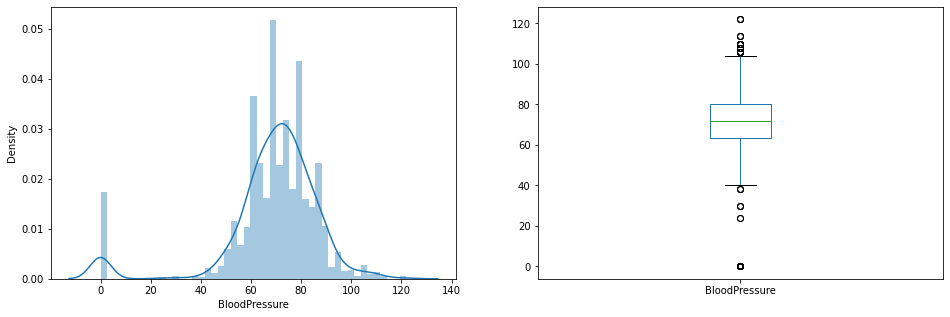

In [11]:
plt.figure(4)
plt.subplot(121), sns.distplot(data['BloodPressure'])
plt.subplot(122), data['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

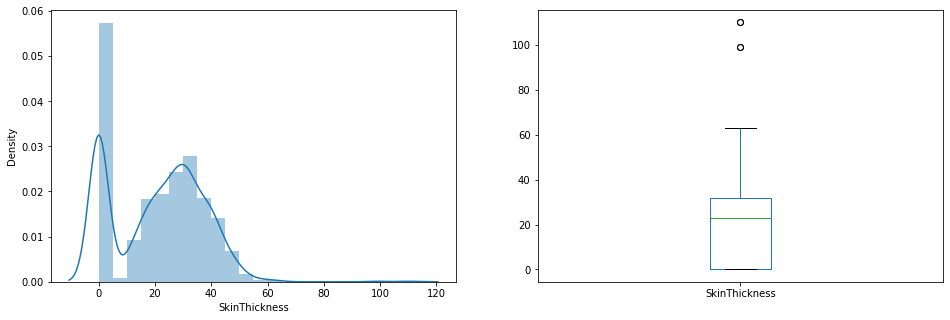

In [12]:
plt.figure(5)
plt.subplot(121), sns.distplot(data['SkinThickness'])
plt.subplot(122), data['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

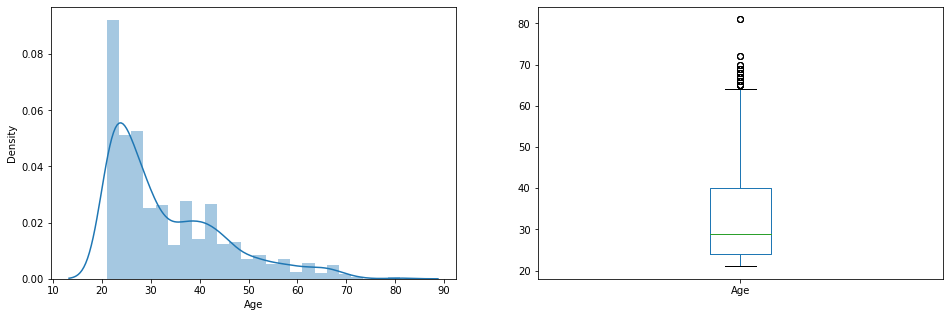

In [13]:
plt.figure(5)
plt.subplot(121), sns.distplot(data['Age'])
plt.subplot(122), data['Age'].plot.box(figsize=(16,5))
plt.show()

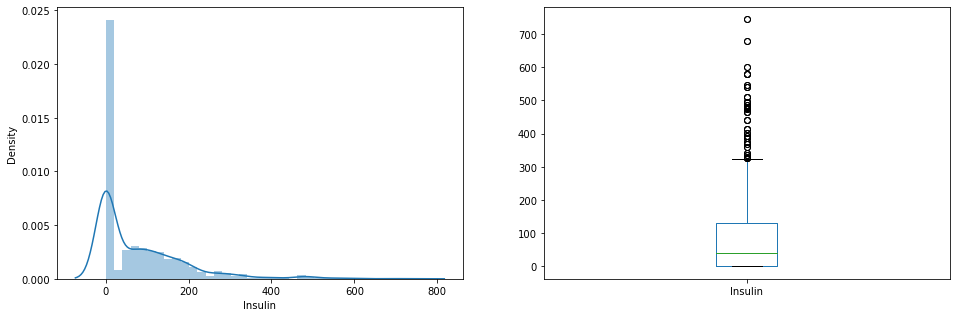

In [14]:
plt.figure(6)
plt.subplot(121), sns.distplot(data['Insulin'])
plt.subplot(122), data['Insulin'].plot.box(figsize=(16,5))
plt.show()

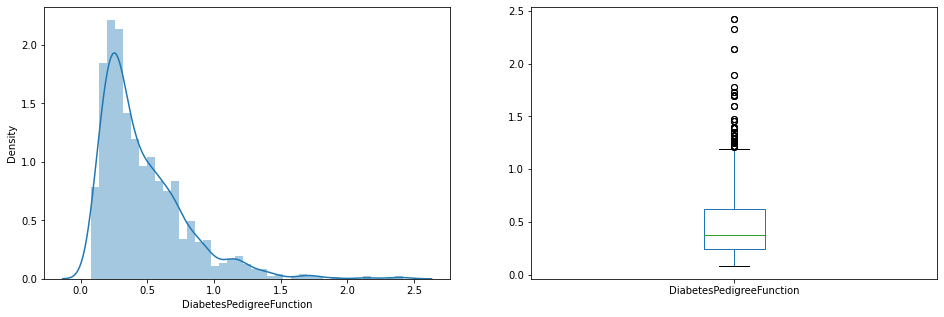

In [15]:
plt.figure(7)
plt.subplot(121), sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(122), data['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

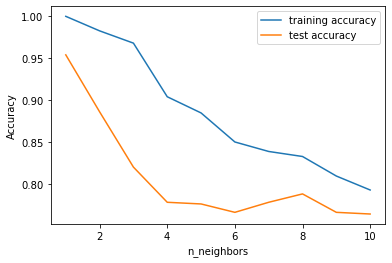

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.76


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.785
Test set score: 0.774


In [19]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.775
Test set accuracy: 0.768


In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.779
Test set accuracy: 0.770


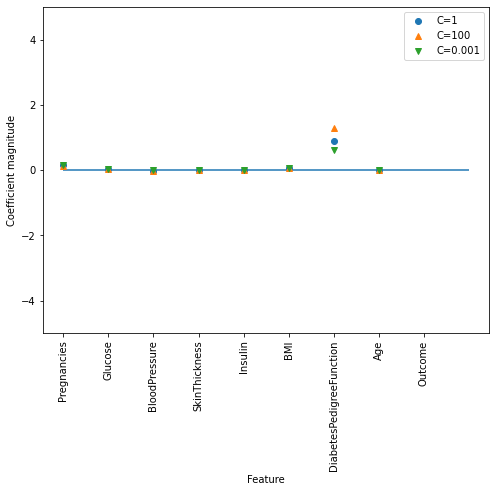

In [21]:
data_features = [x for i,x in enumerate(data.columns) if i!=9]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(data.shape[1]), data_features, rotation=90)
plt.hlines(0, 0, data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [22]:
#check missing values in data set. 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

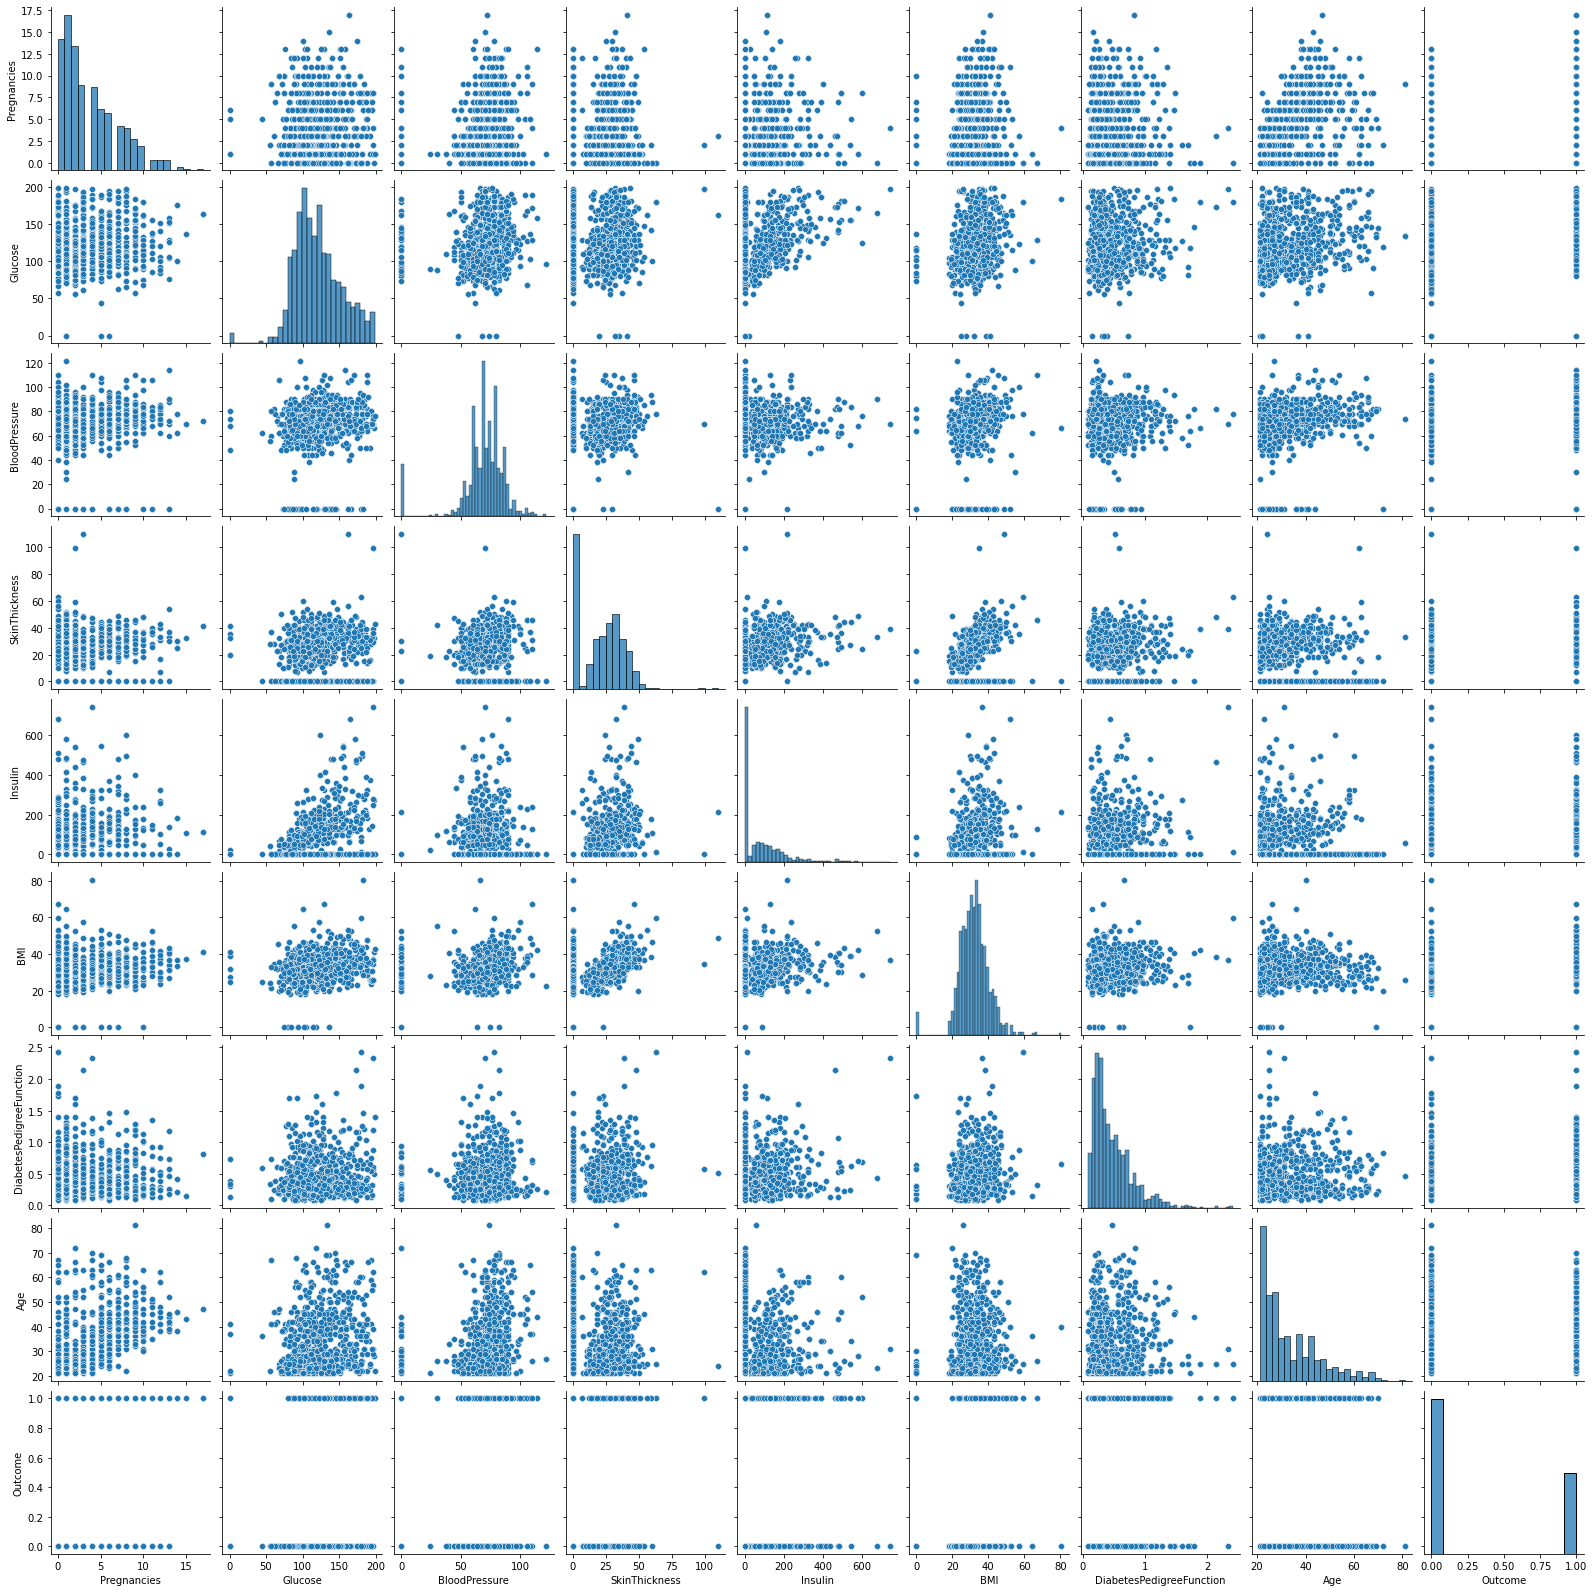

In [23]:
# Pairplot is use to check plotting relationship in the dataset. There are different ways to display relationships using a dataset. Here, we are using pairplot to find relationship. 
sns.pairplot(data)

In [24]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


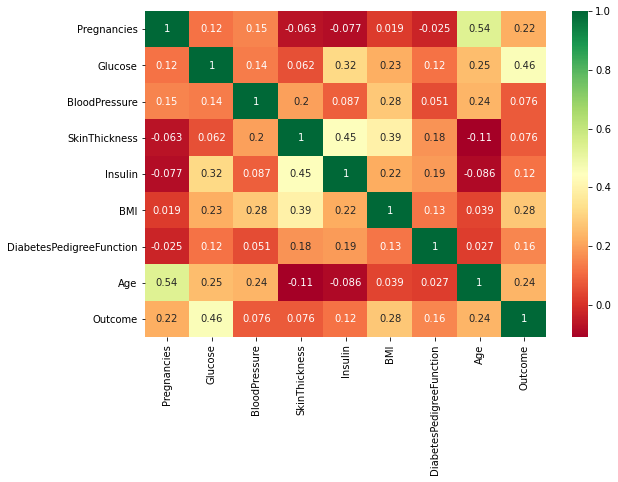

In [25]:
matrix = data.corr()
top_corr_features = matrix.index
g = plt.figure(figsize=(9,6)), sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
# Splitting dataset 

x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [28]:
# check coloums with zero values

print("Total number of rows: {0}", format(len(data)))
print("Number of rows missing pregnancies: {0}",
      format(len(data.loc[data['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}",
      format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of row missing Age: {0}", format(len(data.loc[data['Age']==0])))

Total number of rows: {0} 2000
Number of rows missing pregnancies: {0} 301
Number of rows missing Glucose: {0} 13
Number of rows missing BloodPressure: {0} 90
Number of rows missing SkinThickness: {0} 573
Number of rows missing Insulin: {0} 956
Number of rows missing BMI: {0} 28
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of row missing Age: {0} 0


In [29]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


In [30]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.776
Accuracy on test set: 0.755


In [31]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.64164293 0.         0.         0.         0.23658944
 0.         0.12176763]


In [32]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
# Building the model using RandomForest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947


In [35]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.789
Accuracy on test set: 0.785


In [36]:
predictions = rfc.predict(X_test)

In [37]:
Outcome_map = {True:1,False:0}
data['Outcome'] = data['Outcome'].map(Outcome_map)

In [38]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)

In [41]:
rfc.fit(x_test,y_test)
rfc.score(x_test,y_test)

1.0

In [42]:
rfc.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [43]:
x_demo=[[1,111,65,25,25,0.350,35,1.3]]
if rfc.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to NOT have diabetes


In [44]:
x_demo=[[6,200,90,190,70,0.500,90,2.5]]
if rfc.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to have diabetes
